# SQL Project

In [2]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import mysql.connector

import pandas as pd
import urllib
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request

## 1. 데이터 수집

### 1) 지역별 전기차 등록 현황 데이터

In [3]:
electro_car = pd.read_csv('./sql_project/electro_cars.csv',index_col=0)
electro_car = electro_car.iloc[:-1,:]
electro_car

,지역,2018,2019,2020
0,부산,1567,3216,4320
1,대구,6605,11313,12468
2,대전,1334,2555,3338
3,광주,1447,2464,3046
4,경기,6383,11750,17197
5,강원,1377,2445,3091
6,경북,2001,4051,5400
7,경남,2107,3626,5003
8,충북,1199,2412,3319
9,충남,1127,2841,4252


### 2) 시도별 전기차 보조금 데이터 크롤링

In [4]:
url='https://www.ev.or.kr/portal/buyersGuide/incenTive'
req = Request(url)
response = urlopen(req)
soup = BeautifulSoup(response, "html.parser")
print(soup.prettify())

<!DOCTYPE doctype html>
<html lang="ko">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge, chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="“index,follow”" name="“robots”"/>
  <title>
   무공해차 구매보조금 지원 : 무공해차 통합누리집
  </title>
  <link href="/portal/_css/reset.css?_=7" rel="stylesheet" type="text/css"/>
  <link href="/portal/_css/common.css?_=7" rel="stylesheet" type="text/css"/>
  <link href="/portal/_css/sub.css?_=7" rel="stylesheet" type="text/css"/>
  <script src="/js/jquery-1.10.2.min.js" type="text/javascript">
  </script>
  <script src="/js/portal/ui.js?_=7" type="text/javascript">
  </script>
  <script src="/js/validate.js" type="text/javascript">
  </script>
  <script src="/js/common.js" type="text/javascript">
  </script>
  <script src="/js/cmnReady.js" type="text/javascript">
  </script>
  <link href="/js/cal/themes/base/jquery.ui.all.css" rel="stylesheet"/>
  <script src="/js/cal/ui/jquery.ui.core.js">
  </script>

In [5]:
list_soup=soup.find_all(class_="table_02_2_1")[-1]
list_soup

<table class="table_02_2_1">
<caption>2021년 지자체 구매보조금에 대해 나타낸 표</caption>
<colgroup>
<col style="width:33%;"/>
<col style="width:33%;"/>
<col style="width:33%;"/>
</colgroup>
<thead>
<tr>
<th rowspan="2">시도</th>
<th>전기자동차</th>
<th>수소자동차</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align: center;">서울특별시</td>
<td style="text-align: center;">200</td>
<td style="text-align: center;">1,100</td>
</tr>
<tr>
<td style="text-align: center;">부산광역시</td>
<td style="text-align: center;">450</td>
<td style="text-align: center;">1,200</td>
</tr>
<tr>
<td style="text-align: center;">대구광역시</td>
<td style="text-align: center;">450</td>
<td style="text-align: center;">900</td>
</tr>
<tr>
<td style="text-align: center;">인천광역시</td>
<td style="text-align: center;">480</td><!--500-->
<td style="text-align: center;">1,000</td>
</tr>
<tr>
<td style="text-align: center;">광주광역시</td>
<td style="text-align: center;">500</td><!--600-->
<td style="text-align: center;">1,000</td><!--4월 예정 1000-->
</tr>
<tr>
<td s

In [6]:
body=list_soup.find('tbody')
body

<tbody>
<tr>
<td style="text-align: center;">서울특별시</td>
<td style="text-align: center;">200</td>
<td style="text-align: center;">1,100</td>
</tr>
<tr>
<td style="text-align: center;">부산광역시</td>
<td style="text-align: center;">450</td>
<td style="text-align: center;">1,200</td>
</tr>
<tr>
<td style="text-align: center;">대구광역시</td>
<td style="text-align: center;">450</td>
<td style="text-align: center;">900</td>
</tr>
<tr>
<td style="text-align: center;">인천광역시</td>
<td style="text-align: center;">480</td><!--500-->
<td style="text-align: center;">1,000</td>
</tr>
<tr>
<td style="text-align: center;">광주광역시</td>
<td style="text-align: center;">500</td><!--600-->
<td style="text-align: center;">1,000</td><!--4월 예정 1000-->
</tr>
<tr>
<td style="text-align: center;">대전광역시</td>
<td style="text-align: center;">700</td>
<td style="text-align: center;">1,000</td>
</tr>
<tr>
<td style="text-align: center;">울산광역시</td>
<td style="text-align: center;">550</td><!--600-->
<td style="text-align: center;

In [7]:
temp=list_soup.find_all('tr')
temp

[<tr>
 <th rowspan="2">시도</th>
 <th>전기자동차</th>
 <th>수소자동차</th>
 </tr>,
 <tr>
 <td style="text-align: center;">서울특별시</td>
 <td style="text-align: center;">200</td>
 <td style="text-align: center;">1,100</td>
 </tr>,
 <tr>
 <td style="text-align: center;">부산광역시</td>
 <td style="text-align: center;">450</td>
 <td style="text-align: center;">1,200</td>
 </tr>,
 <tr>
 <td style="text-align: center;">대구광역시</td>
 <td style="text-align: center;">450</td>
 <td style="text-align: center;">900</td>
 </tr>,
 <tr>
 <td style="text-align: center;">인천광역시</td>
 <td style="text-align: center;">480</td><!--500-->
 <td style="text-align: center;">1,000</td>
 </tr>,
 <tr>
 <td style="text-align: center;">광주광역시</td>
 <td style="text-align: center;">500</td><!--600-->
 <td style="text-align: center;">1,000</td><!--4월 예정 1000-->
 </tr>,
 <tr>
 <td style="text-align: center;">대전광역시</td>
 <td style="text-align: center;">700</td>
 <td style="text-align: center;">1,000</td>
 </tr>,
 <tr>
 <td style="text-align: 

In [8]:
sido = [] 
electric_car = [] 
hydrogen_car = [] 

for x in temp:
    info=x.text.split()
    sido.append(info[0])
    electric_car.append(info[1])
    hydrogen_car.append(info[2])

In [9]:
sido.pop(0)
electric_car.pop(0)
hydrogen_car.pop(0)

'수소자동차'

In [10]:
print(len(sido))
print(len(electric_car))
print(len(hydrogen_car))

17
17
17


In [11]:
data = {
    "sido":sido,
    'electric_car' : electric_car,
    'hydrogen_car' : hydrogen_car
}
subsidy = pd.DataFrame(data)
subsidy

,sido,electric_car,hydrogen_car
0,서울특별시,200,"1,100"
1,부산광역시,450,"1,200"
2,대구광역시,450,900
3,인천광역시,480,"1,000"
4,광주광역시,500,"1,000"
5,대전광역시,700,"1,000"
6,울산광역시,550,"1,150"
7,세종특별자치시,300,"1,000"
8,경기도,400~600,"1,000"
9,강원도,520,"1,500"


In [12]:
# ',' 제거

import re
electro = []
hydro = []
for x in subsidy['electric_car']:
    electro.append(re.sub("\,","",x))
for x in subsidy['hydrogen_car']:
    hydro.append(re.sub("\,","",x))
subsidy['electric_car'] = electro
subsidy['hydrogen_car'] = hydro
subsidy

,sido,electric_car,hydrogen_car
0,서울특별시,200,1100
1,부산광역시,450,1200
2,대구광역시,450,900
3,인천광역시,480,1000
4,광주광역시,500,1000
5,대전광역시,700,1000
6,울산광역시,550,1150
7,세종특별자치시,300,1000
8,경기도,400~600,1000
9,강원도,520,1500


In [13]:
# 범위 -> 평균으로 

import numpy as np

cols = ['electric_car','hydrogen_car']
for i, row in subsidy.iterrows():
    for col in cols:
        temp = row[col].split('~')
        # print(temp)
        # maxX = 0
        if len(temp) > 1:
            a=int(temp[0])
            b=int(temp[1])
            meanX=(a+b)//2
                # maxX = max(maxX, int(x))
        else:
            meanX = max(temp)
        # meanX = np.mean(temp)
        try:
            row[col] = int(meanX)
        except:
            row[col] = 0
subsidy

,sido,electric_car,hydrogen_car
0,서울특별시,200,1100
1,부산광역시,450,1200
2,대구광역시,450,900
3,인천광역시,480,1000
4,광주광역시,500,1000
5,대전광역시,700,1000
6,울산광역시,550,1150
7,세종특별자치시,300,1000
8,경기도,500,1000
9,강원도,520,1500


### 3) 지역별 전기차 충전소 현황 데이터

In [155]:
station = pd.read_csv('./sql_project/한국전력공사_지역별 전기차 충전소 현황정보.csv',encoding='euc-kr')
station

,지역,2016,2017,2018,2019,2020
0,강원도,5,118,142,169,174
1,경기도,22,572,632,682,737
2,경상남도,23,197,233,253,265
3,경상북도,8,128,178,192,209
4,광주광역시,4,54,76,87,91
5,대구광역시,4,181,205,223,241
6,대전광역시,3,86,98,105,107
7,부산광역시,6,97,120,126,137
8,서울특별시,28,444,518,546,580
9,세종특별자치시,1,48,61,61,63


### 4) 지역별 주관적 환경인식 데이터
- 현재 체감환경 : 대기
- 환경문제 인식 : 미세먼지 유입
- 환경문제 인식 : 기후변화

In [4]:
recog_atmos = pd.read_excel('./sql_project/sql_현재_체감환경_대기__13세_이상_인구.xlsx',header=1)
recog_atmos['65세(1)'] = recog_atmos['65세(1)'].fillna(method='ffill')
recog_atmos['65세(1).1'] = recog_atmos['65세(1).1'].fillna(method='ffill')
recog_atmos

/Users/hangnii/miniforge3/envs/ds_study/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,65세(1),65세(1).1,65세(2),계,매우 좋다,약간 좋다,보통,약간 나쁘다,매우 나쁘다
0,전국,전체,계,100.0,11.356,26.826,39.217,17.721,4.88
1,전국,동·읍면부,동부,100.0,8.623,25.88,41.458,18.97,5.07
2,전국,동·읍면부,읍면부,100.0,24.007,31.202,28.847,11.943,4.002
3,전국,성별,남자,100.0,11.626,26.682,39.623,17.057,5.012
4,전국,성별,여자,100.0,11.091,26.967,38.819,18.372,4.75
...,...,...,...,...,...,...,...,...,...
280,제주,경제활동,취 업,100.0,23.88,42.057,27.971,5.009,1.082
281,제주,경제활동,실업 및 비경제활동,100.0,25.549,38.269,27.264,7.79,1.127
282,제주,주관적 만족감,만족,100.0,32.332,42.255,18.543,5.914,0.956
283,제주,주관적 만족감,보통,100.0,18.432,39.048,35.317,5.987,1.217


In [16]:
recog_dust = pd.read_excel('./sql_project/sql_환경문제에_대한_인식_미세먼지_유입__13세_이상_인구.xlsx')
recog_dust

,행정구역별(1),특성별(1),특성별(2),계,전혀 불안하지 않음,별로 불안하지 않음,보통,약간 불안함,매우 불안함
0,전국,전체,계,100,1.45,6.321,19.352,43.286,29.591
1,전국,동·읍면부,동부,100,1.312,5.762,18.853,43.249,30.823
2,전국,동·읍면부,읍면부,100,2.086,8.907,21.662,43.458,23.887
3,전국,성별,남자,100,1.824,7.089,21.662,43.124,26.302
4,전국,성별,여자,100,1.083,5.568,17.088,43.446,32.815
...,...,...,...,...,...,...,...,...,...
277,제주,경제활동,취 업,100,2.187,7.366,21.931,46.592,21.924
278,제주,경제활동,실업 및 비경제활동,100,3.714,9.526,22.364,42.192,22.205
279,제주,주관적 만족감,만족,100,3.681,7.870,19.197,46.864,22.389
280,제주,주관적 만족감,보통,100,2.228,8.934,25.138,43.215,20.485


In [41]:
recog_change = pd.read_excel('./sql_project/sql_환경문제에_대한_인식_기후변화__13세_이상_인구.xlsx',header=1)
recog_change['65세(1)'] = recog_change['65세(1)'].fillna(method='ffill')
recog_change['65세(1).1'] = recog_change['65세(1).1'].fillna(method='ffill')
recog_change

/Users/hangnii/miniforge3/envs/ds_study/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,65세(1),65세(1).1,65세(2),계,전혀 불안하지 않음,별로 불안하지 않음,보통,약간 불안함,매우 불안함
0,전국,전체,계,100.0,4.144,18.386,32.03,38.008,7.432
1,전국,동·읍면부,동부,100.0,3.974,17.788,32.142,38.476,7.62
2,전국,동·읍면부,읍면부,100.0,4.932,21.155,31.512,35.84,6.561
3,전국,성별,남자,100.0,5.053,19.767,34.05,34.977,6.155
4,전국,성별,여자,100.0,3.253,17.033,30.051,40.979,8.684
...,...,...,...,...,...,...,...,...,...
280,제주,경제활동,취 업,100.0,2.599,16.74,27.835,43.647,9.178
281,제주,경제활동,실업 및 비경제활동,100.0,6.892,20.525,26.643,35.508,10.432
282,제주,주관적 만족감,만족,100.0,6.471,16.118,25.532,40.764,11.115
283,제주,주관적 만족감,보통,100.0,2.736,19.556,30.053,40.276,7.38


### 5) 지역별 미세먼지 데이터
- 초미세먼지(PM2.5)
- 미세먼지(PM10)

In [18]:
finedust25 = pd.read_excel('./sql_project/미세먼지_PM2.5__월별_도시별_대기오염도.xlsx')
finedust25['시도별(1)'] = finedust25['시도별(1)'].fillna(method='ffill')
finedust25

/Users/hangnii/miniforge3/envs/ds_study/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,시도별(1),시도별(2),2020. 09,2020. 10,2020. 11,2020. 12,2021. 01,2021. 02
0,총계,소계,12.0,17.0,21.0,24.0,20.0,25.0
1,서울,서울,11.0,17.0,24.0,27.0,21.0,29.0
2,부산,부산,13.0,15.0,17.0,21.0,19.0,21.0
3,대구,대구,15.0,18.0,23.0,24.0,21.0,24.0
4,인천,인천,10.0,15.0,21.0,24.0,20.0,28.0
...,...,...,...,...,...,...,...,...
167,경남,합천,12.0,12.0,15.0,17.0,16.0,18.0
168,경남,도평균,13.0,14.0,17.0,19.0,17.0,19.0
169,제주,제주,14.0,16.0,14.0,15.0,14.0,18.0
170,제주,서귀포,12.0,15.0,12.0,13.0,13.0,16.0


In [19]:
finedust10 = pd.read_excel('./sql_project/미세먼지_PM10__월별_도시별_대기오염도.xlsx')
finedust10['시도별(1)'] = finedust10['시도별(1)'].fillna(method='ffill')
finedust10

/Users/hangnii/miniforge3/envs/ds_study/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,시도별(1),시도별(2),2020. 11,2020. 12,2021. 01,2021. 02,2021. 03,2021. 04
0,총계,소계,38.0,38.0,39.0,43.0,65.0,41.0
1,서울,서울,42.0,42.0,38.0,48.0,67.0,42.0
2,부산,부산,31.0,33.0,36.0,37.0,60.0,37.0
3,대구,대구,40.0,38.0,40.0,41.0,59.0,42.0
4,인천,인천,39.0,39.0,37.0,46.0,69.0,42.0
...,...,...,...,...,...,...,...,...
167,경남,합천,25.0,24.0,28.0,29.0,44.0,32.0
168,경남,도평균,30.0,30.0,33.0,33.0,53.0,34.0
169,제주,제주,31.0,28.0,34.0,36.0,76.0,37.0
170,제주,서귀포,27.0,22.0,29.0,33.0,68.0,35.0


## 2. SQL에 적재하기

### 1) database 생성

In [64]:

remote = mysql.connector.connect(
    host = 'database-1.cq3mzadwplat.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'admin',
    password = 'love3701',
)

cur = remote.cursor()
sql = 'CREATE DATABASE sqlproj'
cur.execute(sql)

### 2) 테이블 생성

In [150]:
# electro_car TABLE 생성

remote = mysql.connector.connect(
    host = 'database-1.cq3mzadwplat.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'admin',
    password = 'love3701',
    database = 'sqlproj'
)

cur = remote.cursor()
sql = open('electro_cars.sql').read()
cur.execute(sql)

In [151]:
# subsidy TABLE 생성

remote = mysql.connector.connect(
    host = 'database-1.cq3mzadwplat.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'admin',
    password = 'love3701',
    database = 'sqlproj'
)

cur = remote.cursor()
sql = open('table_subsidy.sql').read()
cur.execute(sql)

In [18]:
# station TABLE 생성

remote = mysql.connector.connect(
    host = 'database-1.cq3mzadwplat.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'admin',
    password = 'love3701',
    database = 'sqlproj'
)

cur = remote.cursor()
sql = open('table_station.sql').read()
cur.execute(sql)

In [ ]:
# 나머지 테이블 한번에 생성

remote = mysql.connector.connect(
    host = 'database-1.cq3mzadwplat.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'admin',
    password = 'love3701',
    database = 'sqlproj'
)

cur = remote.cursor()
sql = open('table.sql').read()
cur.execute(sql, multi=True)

# for res in cur.execute(sql, multi=True):
#     if res.with_rows:
#         print(res.fetchall())
#     else:
#         print(res.statement)

# remote.commit()
# remote.close()

### 3) 데이터 적재

In [ ]:
# electro_car 데이터 적재

import mysql.connector
remote = mysql.connector.connect(
    host = 'database-1.cq3mzadwplat.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'admin',
    password = 'love3701',
    database = 'sqlproj'
)

cur = remote.cursor(buffered=True)
sql = 'INSERT INTO ELECTRO_CAR VALUES (%s, %s, %s, %s)'
for i, row in electro_car.iterrows():
    cur.execute(sql, tuple(row))
    print(tuple(row))
    remote.commit()

('부산', 1567, 3216, 4320)
('대구', 6605, 11313, 12468)
('대전', 1334, 2555, 3338)
('광주', 1447, 2464, 3046)
('경기', 6383, 11750, 17197)
('강원', 1377, 2445, 3091)
('경북', 2001, 4051, 5400)
('경남', 2107, 3626, 5003)
('충북', 1199, 2412, 3319)
('충남', 1127, 2841, 4252)
('전북', 997, 1841, 2906)
('전남', 1974, 3326, 4576)
('세종', 394, 903, 1076)
('서울', 9564, 14952, 20997)
('인천', 1284, 2598, 4204)
('울산', 847, 1447, 2142)
('제주', 15549, 18178, 20699)


In [19]:
# station TABLE 데이터 적재

import mysql.connector
remote = mysql.connector.connect(
    host = 'database-1.cq3mzadwplat.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'admin',
    password = 'love3701',
    database = 'sqlproj'
)

cur = remote.cursor(buffered=True)
sql = 'INSERT INTO STATION VALUES (%s, %s, %s, %s, %s, %s)'
for i, row in station.iterrows():
    cur.execute(sql, tuple(row))
    print(tuple(row))
    remote.commit()

('강원도', 5, 118, 142, 169, 174)
('경기도', 22, 572, 632, 682, 737)
('경상남도', 23, 197, 233, 253, 265)
('경상북도', 8, 128, 178, 192, 209)
('광주광역시', 4, 54, 76, 87, 91)
('대구광역시', 4, 181, 205, 223, 241)
('대전광역시', 3, 86, 98, 105, 107)
('부산광역시', 6, 97, 120, 126, 137)
('서울특별시', 28, 444, 518, 546, 580)
('세종특별자치시', 1, 48, 61, 61, 63)
('울산광역시', 4, 38, 42, 45, 48)
('인천광역시', 3, 117, 129, 134, 148)
('전라남도', 20, 127, 154, 173, 186)
('전라북도', 9, 109, 130, 143, 149)
('제주특별자치도', 7, 156, 186, 205, 203)
('충청남도', 5, 74, 98, 110, 119)
('충청북도', 13, 125, 145, 153, 173)


In [21]:
# subsidy TABLE 데이터 적재

import mysql.connector
remote = mysql.connector.connect(
    host = 'database-1.cq3mzadwplat.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'admin',
    password = 'love3701',
    database = 'sqlproj'
)

cur = remote.cursor(buffered=True)
sql = 'INSERT INTO SUBSIDY VALUES (%s, %s, %s)'
for i, row in subsidy.iterrows():
    cur.execute(sql, tuple(row))
    print(tuple(row))
    remote.commit()

('서울특별시', 200, 1100)
('부산광역시', 450, 1200)
('대구광역시', 450, 900)
('인천광역시', 480, 1000)
('광주광역시', 500, 1000)
('대전광역시', 700, 1000)
('울산광역시', 550, 1150)
('세종특별자치시', 300, 1000)
('경기도', 500, 1000)
('강원도', 520, 1500)
('충청북도', 800, 1000)
('충청남도', 850, 1000)
('전라북도', 900, 1400)
('전라남도', 840, 1350)
('경상북도', 850, 1000)
('경상남도', 700, 1060)
('제주특별자치도', 450, 0)


In [36]:
import mysql.connector
remote = mysql.connector.connect(
    host = 'database-1.cq3mzadwplat.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'admin',
    password = 'love3701',
    database = 'sqlproj'
)

cur = remote.cursor(buffered=True)
sql = 'INSERT INTO DUST2 VALUES (%s, %s, %s, %s, %s, %s, %s, %s)'
for i, row in finedust25.iterrows():
    cur.execute(sql, tuple(row))
    print(tuple(row))
    remote.commit()

('총계', '소계', 12.0, 17.0, 21.0, 24.0, 20.0, 25.0)
('서울', '서울', 11.0, 17.0, 24.0, 27.0, 21.0, 29.0)
('부산', '부산', 13.0, 15.0, 17.0, 21.0, 19.0, 21.0)
('대구', '대구', 15.0, 18.0, 23.0, 24.0, 21.0, 24.0)
('인천', '인천', 10.0, 15.0, 21.0, 24.0, 20.0, 28.0)
('광주', '광주', 13.0, 17.0, 20.0, 24.0, 22.0, 25.0)
('대전', '대전', 12.0, 18.0, 20.0, 20.0, 18.0, 21.0)
('울산', '울산', 14.0, 15.0, 17.0, 19.0, 17.0, 21.0)
('세종', '세종', 10.0, 20.0, 25.0, 28.0, 25.0, 27.0)
('경기', '수원', 11.0, 18.0, 24.0, 26.0, 21.0, 30.0)
('경기', '안양', 13.0, 20.0, 26.0, 25.0, 19.0, 29.0)
('경기', '성남', 10.0, 16.0, 22.0, 26.0, 20.0, 29.0)
('경기', '의정부', 10.0, 16.0, 24.0, 28.0, 21.0, 28.0)
('경기', '광명', 11.0, 19.0, 26.0, 30.0, 25.0, 35.0)
('경기', '안산', '9*', 16.0, 23.0, 27.0, 22.0, 31.0)
('경기', '평택', 13.0, 22.0, 27.0, 28.0, 24.0, 33.0)
('경기', '과천', 9.0, 16.0, 22.0, 26.0, 20.0, 29.0)
('경기', '구리', 10.0, 16.0, 22.0, 27.0, 20.0, 27.0)
('경기', '의왕', 11.0, 18.0, 25.0, 27.0, 20.0, 29.0)
('경기', '고양', 12.0, 17.0, 23.0, 24.0, 19.0, 27.0)
('경기', '광주', 10.0, 1

In [37]:
import mysql.connector
remote = mysql.connector.connect(
    host = 'database-1.cq3mzadwplat.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'admin',
    password = 'love3701',
    database = 'sqlproj'
)

cur = remote.cursor(buffered=True)
sql = 'INSERT INTO DUST10 VALUES (%s, %s, %s, %s, %s, %s, %s, %s)'
for i, row in finedust10.iterrows():
    cur.execute(sql, tuple(row))
    print(tuple(row))
    remote.commit()

('총계', '소계', 38.0, 38.0, 39.0, 43.0, 65.0, 41.0)
('서울', '서울', 42.0, 42.0, 38.0, 48.0, 67.0, 42.0)
('부산', '부산', 31.0, 33.0, 36.0, 37.0, 60.0, 37.0)
('대구', '대구', 40.0, 38.0, 40.0, 41.0, 59.0, 42.0)
('인천', '인천', 39.0, 39.0, 37.0, 46.0, 69.0, 42.0)
('광주', '광주', 32.0, 33.0, 37.0, 40.0, 65.0, 39.0)
('대전', '대전', 37.0, 38.0, 39.0, 42.0, 63.0, 41.0)
('울산', '울산', 31.0, 30.0, 34.0, 35.0, 55.0, 37.0)
('세종', '세종', 40.0, 44.0, 45.0, 47.0, 67.0, 42.0)
('경기', '수원', 45.0, 44.0, 41.0, 52.0, 75.0, 48.0)
('경기', '안양', 44.0, 45.0, 41.0, 53.0, 76.0, 49.0)
('경기', '성남', 41.0, 41.0, 39.0, 49.0, 67.0, 43.0)
('경기', '의정부', 41.0, 41.0, 36.0, 46.0, 61.0, 40.0)
('경기', '광명', 52.0, 49.0, 47.0, 60.0, 85.0, 51.0)
('경기', '안산', 43.0, 45.0, 43.0, 54.0, 76.0, 46.0)
('경기', '평택', 48.0, 45.0, 43.0, 54.0, 82.0, 51.0)
('경기', '과천', 43.0, 45.0, 41.0, 54.0, 75.0, 48.0)
('경기', '구리', 43.0, 45.0, 40.0, 49.0, 66.0, 44.0)
('경기', '의왕', 41.0, 42.0, 39.0, 50.0, 65.0, '40**')
('경기', '고양', 45.0, 43.0, 40.0, 49.0, 70.0, 44.0)
('경기', '광주', 49.0

In [5]:
import mysql.connector
remote = mysql.connector.connect(
    host = 'database-1.cq3mzadwplat.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'admin',
    password = 'love3701',
    database = 'sqlproj'
)

cur = remote.cursor(buffered=True)
sql = 'INSERT INTO RECOG_ATMOS VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)'
for i, row in recog_atmos.iterrows():
    cur.execute(sql, tuple(row))
    print(tuple(row))
    remote.commit()

('전국', '전체', '계', 100.0, 11.356, 26.826, 39.217, 17.721, 4.88)
('전국', '동·읍면부', '동부', 100.0, 8.623, 25.88, 41.458, 18.97, 5.07)
('전국', '동·읍면부', '읍면부', 100.0, 24.007, 31.202, 28.847, 11.943, 4.002)
('전국', '성별', '남자', 100.0, 11.626, 26.682, 39.623, 17.057, 5.012)
('전국', '성별', '여자', 100.0, 11.091, 26.967, 38.819, 18.372, 4.75)
('전국', '주택유형', '단독주택', 100.0, 17.218, 27.157, 36.362, 15.542, 3.722)
('전국', '주택유형', '아파트', 100.0, 9.577, 27.748, 39.421, 18.008, 5.247)
('전국', '주택유형', '기 타1', 100.0, 7.576, 23.138, 43.311, 20.4, 5.575)
('전국', '연령', '15∼19세', '-', '-', '-', '-', '-', '-')
('전국', '연령', '13∼19세', 100.0, 16.199, 30.466, 37.404, 12.796, 3.135)
('전국', '연령', '20∼29세', 100.0, 9.012, 24.835, 40.979, 19.291, 5.883)
('전국', '연령', '30∼39세', 100.0, 7.074, 23.269, 40.616, 21.161, 7.88)
('전국', '연령', '40∼49세', 100.0, 8.851, 27.458, 39.568, 18.547, 5.576)
('전국', '연령', '50∼59세', 100.0, 10.285, 26.587, 42.552, 16.694, 3.882)
('전국', '연령', '60세이상', 100.0, 16.392, 28.785, 35.252, 16.331, 3.239)
('전국', '연령'

In [43]:
import mysql.connector
remote = mysql.connector.connect(
    host = 'database-1.cq3mzadwplat.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'admin',
    password = 'love3701',
    database = 'sqlproj'
)

cur = remote.cursor(buffered=True)
sql = 'INSERT INTO RECOG_CHANGE VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)'
for i, row in recog_change.iterrows():
    cur.execute(sql, tuple(row))
    print(tuple(row))
    remote.commit()

('전국', '전체', '계', 100.0, 4.144, 18.386, 32.03, 38.008, 7.432)
('전국', '동·읍면부', '동부', 100.0, 3.974, 17.788, 32.142, 38.476, 7.62)
('전국', '동·읍면부', '읍면부', 100.0, 4.932, 21.155, 31.512, 35.84, 6.561)
('전국', '성별', '남자', 100.0, 5.053, 19.767, 34.05, 34.977, 6.155)
('전국', '성별', '여자', 100.0, 3.253, 17.033, 30.051, 40.979, 8.684)
('전국', '주택유형', '단독주택', 100.0, 5.15, 20.909, 32.602, 34.92, 6.418)
('전국', '주택유형', '아파트', 100.0, 3.742, 17.531, 31.37, 39.485, 7.873)
('전국', '주택유형', '기 타1', 100.0, 3.824, 17.06, 33.315, 38.166, 7.635)
('전국', '연령', '15∼19세', '-', '-', '-', '-', '-', '-')
('전국', '연령', '13∼19세', 100.0, 9.21, 22.032, 31.123, 30.278, 7.357)
('전국', '연령', '20∼29세', 100.0, 5.779, 20.188, 33.874, 32.903, 7.256)
('전국', '연령', '30∼39세', 100.0, 3.82, 17.589, 30.951, 39.245, 8.394)
('전국', '연령', '40∼49세', 100.0, 2.653, 15.447, 29.269, 43.194, 9.438)
('전국', '연령', '50∼59세', 100.0, 2.951, 16.088, 32.51, 40.645, 7.807)
('전국', '연령', '60세이상', 100.0, 3.885, 20.525, 33.483, 36.801, 5.306)
('전국', '연령', '65세이상', 

In [44]:
import mysql.connector
remote = mysql.connector.connect(
    host = 'database-1.cq3mzadwplat.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'admin',
    password = 'love3701',
    database = 'sqlproj'
)

cur = remote.cursor(buffered=True)
sql = 'INSERT INTO RECOG_DUST VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)'
for i, row in recog_dust.iterrows():
    cur.execute(sql, tuple(row))
    print(tuple(row))
    remote.commit()

('전국', '전체', '계', 100, 1.45, 6.321, 19.352, 43.286, 29.591)
('전국', '동·읍면부', '동부', 100, 1.312, 5.762, 18.853, 43.249, 30.823)
('전국', '동·읍면부', '읍면부', 100, 2.086, 8.907, 21.662, 43.458, 23.887)
('전국', '성별', '남자', 100, 1.824, 7.089, 21.662, 43.124, 26.302)
('전국', '성별', '여자', 100, 1.083, 5.568, 17.088, 43.446, 32.815)
('전국', '주택유형', '단독주택', 100, 1.968, 8.962, 22.83, 43.129, 23.11)
('전국', '주택유형', '아파트', 100, 1.214, 5.31, 17.506, 43.301, 32.669)
('전국', '주택유형', '기 타1', 100, 1.383, 5.328, 19.793, 43.501, 29.995)
('전국', '연령', '13∼19세', 100, 3.559, 8.401, 24.248, 41.04, 22.752)
('전국', '연령', '20∼29세', 100, 1.652, 6.805, 20.189, 42.287, 29.068)
('전국', '연령', '30∼39세', 100, 1.047, 4.405, 15.856, 39.475, 39.218)
('전국', '연령', '40∼49세', 100, 1.074, 4.81, 16.761, 41.899, 35.457)
('전국', '연령', '50∼59세', 100, 1.283, 5.669, 18.998, 45.938, 28.112)
('전국', '연령', '60세이상', 100, 1.363, 8.138, 21.663, 45.837, 23.0)
('전국', '연령', '65세이상', 100, 1.542, 9.211, 22.217, 45.762, 21.268)
('전국', '교육정도', '초졸이하', 100, 2.485, 

## 3. SQL에서 데이터 전처리

### 1) 미세먼지 데이터

#### (1) DUST10 전처리

In [51]:
import mysql.connector
remote = mysql.connector.connect(
    host = 'database-1.cq3mzadwplat.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'admin',
    password = 'love3701',
    database = 'sqlproj'
)

cur = remote.cursor(buffered=True)
sql = 'delete from DUST10 where (not sido=sido_2) and (not sido_2 like "도평균")'
cur.execute(sql)
remote.commit()

In [52]:
cur = remote.cursor(buffered=True)
sql = 'delete from DUST10 where sido like "제주" and sido_2 like "제주"'
cur.execute(sql)
remote.commit()

In [53]:
cur = remote.cursor(buffered=True)
sql = 'alter table DUST10 drop column sido_2'
cur.execute(sql)
remote.commit()

#### (2) DUST2.5 전처리

In [54]:
cur = remote.cursor(buffered=True)
sql = 'delete from DUST2 where (not sido=sido_2) and (not sido_2 like "도평균")'
cur.execute(sql)
remote.commit()

In [55]:
cur = remote.cursor(buffered=True)
sql = 'delete from DUST2 where sido like "제주" and sido_2 like "제주"'
cur.execute(sql)
remote.commit()

In [56]:
cur = remote.cursor(buffered=True)
sql = 'alter table DUST2 drop column sido_2'
cur.execute(sql)
remote.commit()

### 2) 주관적 환경인식 데이터

In [59]:
tables=['RECOG_DUST', 'RECOG_ATMOS', 'RECOG_CHANGE']
for table in tables:
    cur = remote.cursor(buffered=True)
    sql = 'delete from ' + table + ' where not feature2 like "계"'
    cur.execute(sql)
    remote.commit()

RECOG_DUST
RECOG_ATMOS
RECOG_CHANGE


In [ ]:
# tables=['RECOG_DUST', 'RECOG_ATMOS', 'RECOG_CHANGE']
# cols = ['feature1', 'feature2', 'sumvalue']
# for table in tables:
#     print(table)
#     cur = remote.cursor(buffered=True)
#     for col in cols:
#         print(col)
#         sql = 'alter table ' + table + ' drop column feature1'
#         cur.execute(sql)
#         remote.commit()

In [ ]:
cols = ['feature1', 'feature2', 'sumvalue']
for col in cols:
    cur = remote.cursor(buffered=True)
    sql = 'alter table RECOG_DUST drop column ' + col
    cur.execute(sql)
    remote.commit()

In [9]:
cols = ['feature1', 'feature2', 'sumvalue']
for col in cols:
    cur = remote.cursor(buffered=True)
    sql = 'alter table RECOG_CHANGE drop column ' + col
    cur.execute(sql)
    remote.commit()

In [12]:
cols = ['feature1', 'feature2', 'sumvalue']
for col in cols:
    cur = remote.cursor(buffered=True)
    sql = 'alter table RECOG_ATMOS drop column ' + col
    cur.execute(sql)
    remote.commit()

### 3) STATION, SUBSIDY 시도 변환

In [20]:
cur = remote.cursor()
sql = 'update STATION set region=mid(region,1,2) where length(region)>=15'
cur.execute(sql)
remote.commit()

In [21]:
# 강원도, 경기도 
cur = remote.cursor()
sql = 'update STATION set region=mid(region,1,2) where length(region)<=9'
cur.execute(sql)
remote.commit()

In [22]:
# ㅇㅇ남도, ㅇㅇ북도 => ㅇ남, ㅇ북

cur = remote.cursor()
sql = 'update STATION set region=concat(mid(region,1,1), mid(region,3,1)) where length(region)=12'
cur.execute(sql)
remote.commit()

In [26]:
# ㅇㅇ남도, ㅇㅇ북도 => ㅇ남, ㅇ북
cur = remote.cursor()
sql = 'update SUBSIDY set sido=concat(mid(sido,1,1), mid(sido,3,1)) where length(sido)=12'
cur.execute(sql)
remote.commit()

In [25]:
# 나머지
cur = remote.cursor()
sql = 'update SUBSIDY set sido=mid(sido,1,2) where not length(sido)=12'
cur.execute(sql)
remote.commit()

## 4. 기본키, 외래키 설정

In [27]:
cur = remote.cursor()
sql = 'alter table ELECTRO_CAR add primary key (region)'
cur.execute(sql)
remote.commit()

In [28]:
cur = remote.cursor()
sql = 'alter table SUBSIDY add foreign key (sido) references ELECTRO_CAR(region)'
cur.execute(sql)
remote.commit()

In [29]:
cur = remote.cursor()
sql = 'alter table STATION add foreign key (region) references ELECTRO_CAR(region)'
cur.execute(sql)
remote.commit()

In [30]:
for table in ['DUST2', 'DUST10']:
    cur = remote.cursor()
    sql = 'alter table ' + table + ' add foreign key (sido) references ELECTRO_CAR(region)'
    cur.execute(sql)
    remote.commit()

In [ ]:
# for table in ['RECOG_ATMOS', 'RECOG_CHANGE', 'RECOG_DUST']:
#     cur = remote.cursor()
#     sql = 'alter table ' + table + ' add foreign key (region) references ELECTRO_CAR(region)'
#     cur.execute(sql)
#     remote.commit()

## 5. 판다스로 옮기기

#### 1) 전기차 3종 데이터

In [4]:
remote = mysql.connector.connect(
    host = 'database-1.cq3mzadwplat.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'admin',
    password = 'love3701',
    database = 'sqlproj'
)
cur = remote.cursor()
cur.execute('SELECT * FROM ELECTRO_CAR ORDER BY y2020 DESC')
result = cur.fetchall()
for row in result:
    print(row)

('서울', 9564, 14952, 20997)
('제주', 15549, 18178, 20699)
('경기', 6383, 11750, 17197)
('대구', 6605, 11313, 12468)
('경북', 2001, 4051, 5400)
('경남', 2107, 3626, 5003)
('전남', 1974, 3326, 4576)
('부산', 1567, 3216, 4320)
('충남', 1127, 2841, 4252)
('인천', 1284, 2598, 4204)
('대전', 1334, 2555, 3338)
('충북', 1199, 2412, 3319)
('강원', 1377, 2445, 3091)
('광주', 1447, 2464, 3046)
('전북', 997, 1841, 2906)
('울산', 847, 1447, 2142)
('세종', 394, 903, 1076)


In [5]:
car = pd.DataFrame(result)
car.columns = ['sido','y2018','y2019','y2020']
car.head()

,sido,y2018,y2019,y2020
0,서울,9564,14952,20997
1,제주,15549,18178,20699
2,경기,6383,11750,17197
3,대구,6605,11313,12468
4,경북,2001,4051,5400


In [6]:
remote = mysql.connector.connect(
    host = 'database-1.cq3mzadwplat.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'admin',
    password = 'love3701',
    database = 'sqlproj'
)
cur = remote.cursor()
cur.execute('SELECT * FROM SUBSIDY')
result = cur.fetchall()
for row in result:
    print(row)

('서울', 200, 1100)
('부산', 450, 1200)
('대구', 450, 900)
('인천', 480, 1000)
('광주', 500, 1000)
('대전', 700, 1000)
('울산', 550, 1150)
('세종', 300, 1000)
('경기', 500, 1000)
('강원', 520, 1500)
('충북', 800, 1000)
('충남', 850, 1000)
('전북', 900, 1400)
('전남', 840, 1350)
('경북', 850, 1000)
('경남', 700, 1060)
('제주', 450, 0)


In [7]:
subsidy = pd.DataFrame(result)
subsidy.columns = ['sido','electro_car', 'hydro_car']
subsidy.head()

,sido,electro_car,hydro_car
0,서울,200,1100
1,부산,450,1200
2,대구,450,900
3,인천,480,1000
4,광주,500,1000


In [8]:
remote = mysql.connector.connect(
    host = 'database-1.cq3mzadwplat.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'admin',
    password = 'love3701',
    database = 'sqlproj'
)
cur = remote.cursor()
cur.execute('SELECT * FROM STATION')
result = cur.fetchall()
for row in result:
    print(row)

('강원', 5, 118, 142, 169, 174)
('경기', 22, 572, 632, 682, 737)
('경남', 23, 197, 233, 253, 265)
('경북', 8, 128, 178, 192, 209)
('광주', 4, 54, 76, 87, 91)
('대구', 4, 181, 205, 223, 241)
('대전', 3, 86, 98, 105, 107)
('부산', 6, 97, 120, 126, 137)
('서울', 28, 444, 518, 546, 580)
('세종', 1, 48, 61, 61, 63)
('울산', 4, 38, 42, 45, 48)
('인천', 3, 117, 129, 134, 148)
('전남', 20, 127, 154, 173, 186)
('전북', 9, 109, 130, 143, 149)
('제주', 7, 156, 186, 205, 203)
('충남', 5, 74, 98, 110, 119)
('충북', 13, 125, 145, 153, 173)


In [9]:
station = pd.DataFrame(result)
station.columns = ['sido','2016','2017','2018','2019','2020']
station.head()

,sido,2016,2017,2018,2019,2020
0,강원,5,118,142,169,174
1,경기,22,572,632,682,737
2,경남,23,197,233,253,265
3,경북,8,128,178,192,209
4,광주,4,54,76,87,91


#### 2) 환경 데이터

In [10]:
remote = mysql.connector.connect(
    host = 'database-1.cq3mzadwplat.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'admin',
    password = 'love3701',
    database = 'sqlproj'
)
cur = remote.cursor()
cur.execute('SELECT * FROM DUST2')
result = cur.fetchall()
for row in result:
    print(row)

('서울', 11, 17, 24, 27, 21, 29)
('부산', 13, 15, 17, 21, 19, 21)
('대구', 15, 18, 23, 24, 21, 24)
('인천', 10, 15, 21, 24, 20, 28)
('광주', 13, 17, 20, 24, 22, 25)
('대전', 12, 18, 20, 20, 18, 21)
('울산', 14, 15, 17, 19, 17, 21)
('세종', 10, 20, 25, 28, 25, 27)
('경기', 11, 19, 25, 29, 22, 31)
('강원', 10, 15, 20, 24, 18, 22)
('충북', 11, 21, 25, 29, 24, 28)
('충남', 13, 20, 25, 27, 25, 32)
('전북', 14, 19, 22, 23, 22, 26)
('전남', 13, 14, 15, 17, 17, 19)
('경북', 12, 16, 21, 23, 19, 22)
('경남', 13, 14, 17, 19, 17, 19)
('제주', 13, 16, 13, 14, 14, 17)


In [11]:
dust2 = pd.DataFrame(result)
dust2.columns = ['sido','2020.09','2020.10','2020.11','2020.12','2021.01', '2021.02']
dust2.head()

,sido,2020.09,2020.10,2020.11,2020.12,2021.01,2021.02
0,서울,11,17,24,27,21,29
1,부산,13,15,17,21,19,21
2,대구,15,18,23,24,21,24
3,인천,10,15,21,24,20,28
4,광주,13,17,20,24,22,25


In [12]:
remote = mysql.connector.connect(
    host = 'database-1.cq3mzadwplat.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'admin',
    password = 'love3701',
    database = 'sqlproj'
)
cur = remote.cursor()
cur.execute('SELECT * FROM DUST10')
result = cur.fetchall()
for row in result:
    print(row)

('서울', 42, 42, 38, 48, 67, 42)
('부산', 31, 33, 36, 37, 60, 37)
('대구', 40, 38, 40, 41, 59, 42)
('인천', 39, 39, 37, 46, 69, 42)
('광주', 32, 33, 37, 40, 65, 39)
('대전', 37, 38, 39, 42, 63, 41)
('울산', 31, 30, 34, 35, 55, 37)
('세종', 40, 44, 45, 47, 67, 42)
('경기', 45, 46, 42, 52, 72, 46)
('강원', 34, 36, 35, 39, 51, 38)
('충북', 41, 44, 43, 46, 62, 41)
('충남', 42, 42, 45, 52, 79, 46)
('전북', 36, 36, 40, 42, 75, 43)
('전남', 29, 28, 34, 35, 64, 34)
('경북', 36, 36, 38, 40, 56, 42)
('경남', 30, 30, 33, 33, 53, 34)
('제주', 28, 24, 31, 34, 72, 36)


In [13]:
dust10 = pd.DataFrame(result)
dust10.columns = ['sido','2020.11','2020.12','2021.01', '2021.02','2021.03','2021.04',]
dust10.head()

,sido,2020.11,2020.12,2021.01,2021.02,2021.03,2021.04
0,서울,42,42,38,48,67,42
1,부산,31,33,36,37,60,37
2,대구,40,38,40,41,59,42
3,인천,39,39,37,46,69,42
4,광주,32,33,37,40,65,39


#### 3) 주관적 환경인식 데이터

In [14]:
remote = mysql.connector.connect(
    host = 'database-1.cq3mzadwplat.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'admin',
    password = 'love3701',
    database = 'sqlproj'
)
cur = remote.cursor()
cur.execute('SELECT * FROM RECOG_ATMOS')
result = cur.fetchall()
for row in result:
    print(row)

('전국', 11.356, 26.826, 39.217, 17.721, 4.88)
('서울', 6.249, 20.37, 41.958, 24.492, 6.931)
('부산', 13.497, 34.381, 37.144, 12.206, 2.773)
('대구', 8.668, 21.249, 48.022, 18.222, 3.838)
('인천', 5.057, 18.851, 44.469, 23.641, 7.982)
('광주', 8.954, 31.136, 46.317, 12.089, 1.504)
('대전', 8.575, 30.162, 42.336, 15.395, 3.532)
('울산', 7.787, 27.925, 42.206, 18.286, 3.796)
('세종', 10.226, 26.2, 36.662, 20.051, 6.861)
('경기', 9.294, 26.745, 41.347, 17.707, 4.907)
('강원', 27.395, 35.183, 27.085, 7.305, 3.032)
('충북', 11.809, 22.581, 34.14, 23.128, 8.341)
('충남', 12.343, 24.979, 33.369, 22.081, 7.229)
('전북', 13.827, 27.618, 41.312, 13.418, 3.825)
('전남', 29.466, 33.094, 27.706, 7.208, 2.526)
('경북', 19.105, 31.295, 30.756, 14.312, 4.533)
('경남', 15.654, 35.32, 34.298, 13.133, 1.595)
('제주', 24.515, 40.616, 27.702, 6.068, 1.099)


In [15]:
recog_atmos = pd.DataFrame(result)
recog_atmos.columns = ['sido','verygood', 'good', 'moderate', 'bad', 'verybad']
recog_atmos.head()

,sido,verygood,good,moderate,bad,verybad
0,전국,11.356,26.826,39.217,17.721,4.880
1,서울,6.249,20.370,41.958,24.492,6.931
2,부산,13.497,34.381,37.144,12.206,2.773
3,대구,8.668,21.249,48.022,18.222,3.838
4,인천,5.057,18.851,44.469,23.641,7.982


In [16]:
remote = mysql.connector.connect(
    host = 'database-1.cq3mzadwplat.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'admin',
    password = 'love3701',
    database = 'sqlproj'
)
cur = remote.cursor()
cur.execute('SELECT * FROM RECOG_CHANGE')
result = cur.fetchall()
for row in result:
    print(row)

('전국', 4.144, 18.386, 32.03, 38.008, 7.432)
('서울', 3.58, 16.142, 30.664, 41.189, 8.425)
('부산', 4.89, 23.32, 32.399, 33.612, 5.78)
('대구', 3.043, 16.26, 36.691, 35.532, 8.473)
('인천', 3.624, 14.328, 35.499, 38.029, 8.52)
('광주', 3.426, 19.781, 32.056, 37.287, 7.45)
('대전', 4.363, 17.899, 31.685, 38.719, 7.335)
('울산', 6.881, 23.167, 32.326, 32.364, 5.262)
('세종', 4.126, 18.439, 28.691, 40.559, 8.185)
('경기', 3.723, 18.056, 32.551, 38.58, 7.09)
('강원', 4.375, 21.25, 28.598, 36.658, 9.119)
('충북', 3.868, 20.4, 30.182, 37.54, 8.01)
('충남', 3.847, 15.603, 32.885, 41.551, 6.114)
('전북', 6.994, 19.999, 30.019, 34.054, 8.933)
('전남', 3.576, 18.699, 32.017, 39.412, 6.297)
('경북', 5.938, 23.76, 33.286, 30.793, 6.224)
('경남', 4.808, 18.6, 30.428, 39.507, 6.656)
('제주', 4.233, 18.18, 27.382, 40.55, 9.655)


In [17]:
recog_change = pd.DataFrame(result)
recog_change.columns = ['sido','anx0', 'anx25', 'anx50', 'anx75', 'anx100']
recog_change.head()

,sido,anx0,anx25,anx50,anx75,anx100
0,전국,4.144,18.386,32.030,38.008,7.432
1,서울,3.580,16.142,30.664,41.189,8.425
2,부산,4.890,23.320,32.399,33.612,5.780
3,대구,3.043,16.260,36.691,35.532,8.473
4,인천,3.624,14.328,35.499,38.029,8.520


In [18]:
remote = mysql.connector.connect(
    host = 'database-1.cq3mzadwplat.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'admin',
    password = 'love3701',
    database = 'sqlproj'
)
cur = remote.cursor()
cur.execute('SELECT * FROM RECOG_DUST')
result = cur.fetchall()
for row in result:
    print(row)

('전국', 1.45, 6.321, 19.352, 43.286, 29.591)
('서울', 0.963, 4.996, 16.077, 43.242, 34.721)
('부산', 1.614, 8.926, 26.78, 39.557, 23.123)
('대구', 1.156, 4.4, 24.008, 44.151, 26.285)
('인천', 1.031, 4.329, 19.331, 41.612, 33.697)
('광주', 1.263, 9.545, 19.907, 42.434, 26.851)
('대전', 1.782, 6.308, 19.824, 41.061, 31.026)
('울산', 1.89, 10.28, 24.586, 41.133, 22.111)
('세종', 0.949, 4.421, 13.165, 43.328, 38.137)
('경기', 1.5, 5.094, 16.722, 43.788, 32.896)
('강원', 1.806, 8.626, 22.148, 44.295, 23.126)
('충북', 1.138, 6.092, 18.562, 44.015, 30.192)
('충남', 1.366, 5.564, 18.657, 44.597, 29.816)
('전북', 2.073, 6.36, 19.015, 45.997, 26.555)
('전남', 1.735, 8.66, 22.669, 44.653, 22.283)
('경북', 1.968, 11.234, 24.886, 39.53, 22.383)
('경남', 1.82, 7.015, 19.911, 47.039, 24.215)
('제주', 2.768, 8.188, 22.095, 44.918, 22.031)


In [19]:
recog_dust = pd.DataFrame(result)
recog_dust.columns = ['sido','anx0', 'anx25', 'anx50', 'anx75', 'anx100']
recog_dust.head()

,sido,anx0,anx25,anx50,anx75,anx100
0,전국,1.450,6.321,19.352,43.286,29.591
1,서울,0.963,4.996,16.077,43.242,34.721
2,부산,1.614,8.926,26.780,39.557,23.123
3,대구,1.156,4.400,24.008,44.151,26.285
4,인천,1.031,4.329,19.331,41.612,33.697


- 지역별 전기차 수 & 충전소 수 비교

In [20]:
remote = mysql.connector.connect(
    host = 'database-1.cq3mzadwplat.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'admin',
    password = 'love3701',
    database = 'sqlproj'
)
cur = remote.cursor()
sql = 'select e.region, e.y2020, s.y2020 from ELECTRO_CAR e, STATION s where e.region=s.region order by e.y2020 desc;'
cur.execute(sql)
result = cur.fetchall()
for row in result:
    print(row)

('서울', 20997, 580)
('제주', 20699, 203)
('경기', 17197, 737)
('대구', 12468, 241)
('경북', 5400, 209)
('경남', 5003, 265)
('전남', 4576, 186)
('부산', 4320, 137)
('충남', 4252, 119)
('인천', 4204, 148)
('대전', 3338, 107)
('충북', 3319, 173)
('강원', 3091, 174)
('광주', 3046, 91)
('전북', 2906, 149)
('울산', 2142, 48)
('세종', 1076, 63)


-> 전기차의 절대적인 대수는 서울 > 경기 이나, 지리적 면적을 고려했을 때, 경기가 서울보다 더 넓으므로 충전소의 수가 더 많은 것으로 예상.

## 6. EDA, 시각화

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')
from matplotlib import rc 

plt.rcParams["axes.unicode_minus"] = False 
rc("font", family="Arial Unicode MS")
%matplotlib inline 


In [22]:
car.head(2)

,sido,y2018,y2019,y2020
0,서울,9564,14952,20997
1,제주,15549,18178,20699


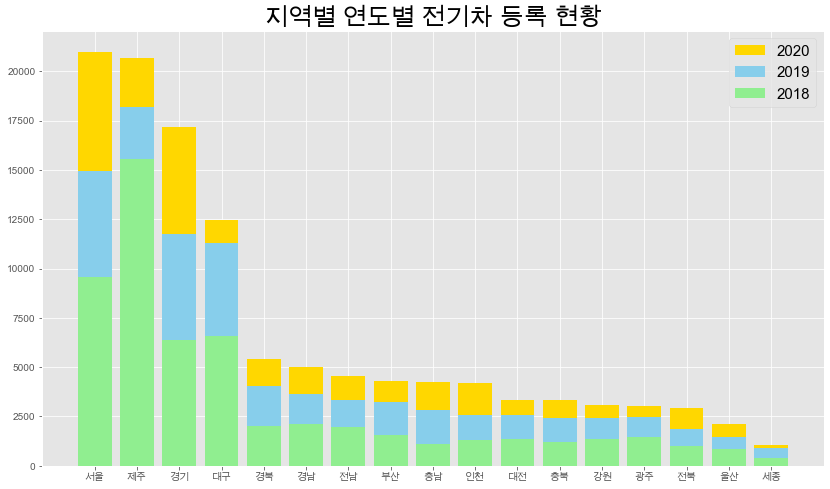

In [78]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
# colors = sns.color_palette('pastel',len(car['sido']))

ax.bar(car.sido, car['y2020'], color='gold', label = '2020')
ax.bar(car.sido, car['y2019'], color='skyblue', label = '2019')
ax.bar(car.sido, car['y2018'], color='lightgreen', label = '2018')
ax.legend(fontsize=15)


plt.title('지역별 연도별 전기차 등록 현황', fontsize=24)
plt.show()

In [23]:
subsidy = subsidy.sort_values(by='electro_car',ascending=False)

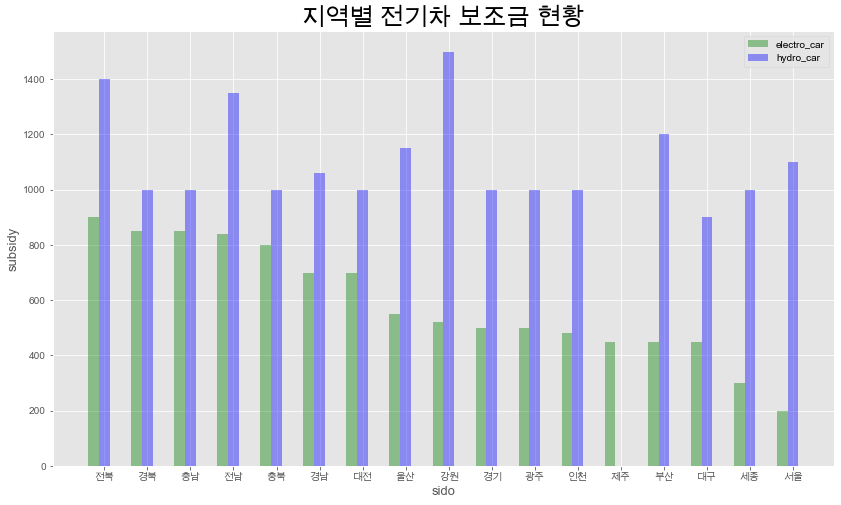

No handles with labels found to put in legend.


In [96]:
import numpy as np
plt.style.use('ggplot')
fig = plt.figure(figsize=(14,8))
barwidth = 0.25
index = np.arange(17)
b1 = plt.bar(index, subsidy['electro_car'], barwidth, alpha=0.4, color='green', label='electro_car')
b2 = plt.bar(index + barwidth, subsidy['hydro_car'], barwidth, alpha=0.4, color='blue', label='hydro_car')
plt.xticks(np.arange(barwidth, 17 + barwidth, 1), subsidy['sido'])

plt.xlabel('sido', size=13)
plt.ylabel('subsidy', size=13)
plt.legend()
plt.title('지역별 전기차 보조금 현황', fontsize=24)
plt.show()
# ax = fig.add_subplot(111)
# colors = sns.color_palette('pastel',len(car['sido']))

# subsidy.plot(x=subsidy.sido, y=[subsidy['electro_car'],subsidy['hydro_car']],kind="bar")
# ax.bar(subsidy.sido, subsidy['electro_car'], color='lightyellow', label = 'electro_car',width=0.5)
ax.legend(fontsize=15)
# ,color='lightblue'


plt.show()

In [24]:
station = station.sort_values(by='2020',ascending=False)
station.head()

,sido,2016,2017,2018,2019,2020
1,경기,22,572,632,682,737
8,서울,28,444,518,546,580
2,경남,23,197,233,253,265
5,대구,4,181,205,223,241
3,경북,8,128,178,192,209


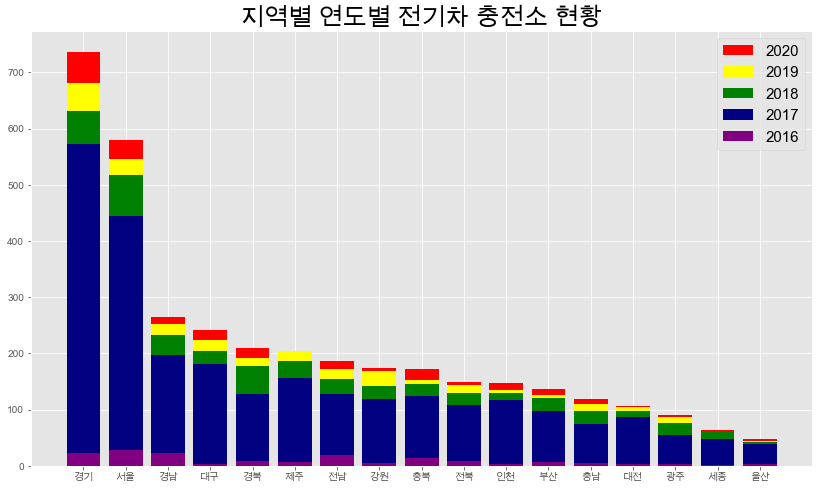

In [164]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
# colors = sns.color_palette('pastel',len(car['sido']))

ax.bar(station.sido, station['2020'], color='red', label = '2020',)
ax.bar(station.sido, station['2019'], color='yellow', label = '2019')
ax.bar(station.sido, station['2018'], color='green', label = '2018')
ax.bar(station.sido, station['2017'], color='navy', label = '2017')
ax.bar(station.sido, station['2016'], color='purple', label = '2016')
ax.legend(fontsize=15)


plt.title('지역별 연도별 전기차 충전소 현황', fontsize=24)
plt.show()

In [25]:
station.head()

,sido,2016,2017,2018,2019,2020
1,경기,22,572,632,682,737
8,서울,28,444,518,546,580
2,경남,23,197,233,253,265
5,대구,4,181,205,223,241
3,경북,8,128,178,192,209


In [28]:
dust = pd.DataFrame(dust2['sido'])
dust = pd.merge(dust2, dust10,how='inner',on='sido')
dust.head()

,sido,2020.09,2020.10,2020.11_x,2020.12_x,2021.01_x,2021.02_x,2020.11_y,2020.12_y,2021.01_y,2021.02_y,2021.03,2021.04
0,서울,11,17,24,27,21,29,42,42,38,48,67,42
1,부산,13,15,17,21,19,21,31,33,36,37,60,37
2,대구,15,18,23,24,21,24,40,38,40,41,59,42
3,인천,10,15,21,24,20,28,39,39,37,46,69,42
4,광주,13,17,20,24,22,25,32,33,37,40,65,39


In [29]:
dust.columns

Index(['sido', '2020.09', '2020.10', '2020.11_x', '2020.12_x', '2021.01_x',
       '2021.02_x', '2020.11_y', '2020.12_y', '2021.01_y', '2021.02_y',
       '2021.03', '2021.04'],
      dtype='object')

In [30]:
# 양년 2월 빼고 drop
dust = dust.drop(columns=['2020.09', '2020.10', '2020.11_x', '2020.12_x', '2021.01_x',
       '2020.11_y', '2020.12_y', '2021.01_y',
       '2021.03', '2021.04'])
dust.columns = ['sido','dust2.5', 'dust10']
dust

,sido,dust2.5,dust10
0,서울,29,48
1,부산,21,37
2,대구,24,41
3,인천,28,46
4,광주,25,40
5,대전,21,42
6,울산,21,35
7,세종,27,47
8,경기,31,52
9,강원,22,39


In [31]:
dust = dust.sort_values(by='dust10',ascending=False)

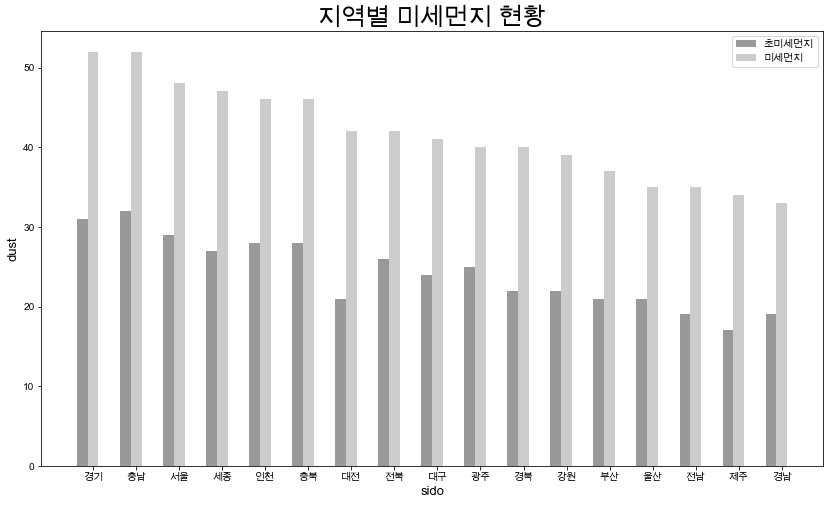

In [28]:
import numpy as np
# plt.style.use('ggplot')
fig = plt.figure(figsize=(14,8))
barwidth = 0.25
index = np.arange(17)
b1 = plt.bar(index, dust['dust2.5'], barwidth, alpha=0.4, color='black', label='초미세먼지')
b2 = plt.bar(index + barwidth, dust['dust10'], barwidth, alpha=0.4, color='gray', label='미세먼지')
plt.xticks(np.arange(barwidth, 17 + barwidth, 1), dust['sido'])
plt.legend(fontsize=20)
plt.xlabel('sido', size=13)
plt.ylabel('dust', size=13)
plt.legend()
plt.title('지역별 미세먼지 현황', fontsize=24)
plt.show()


#### 파이차트

(1) 현재 체감 환경 - 대기

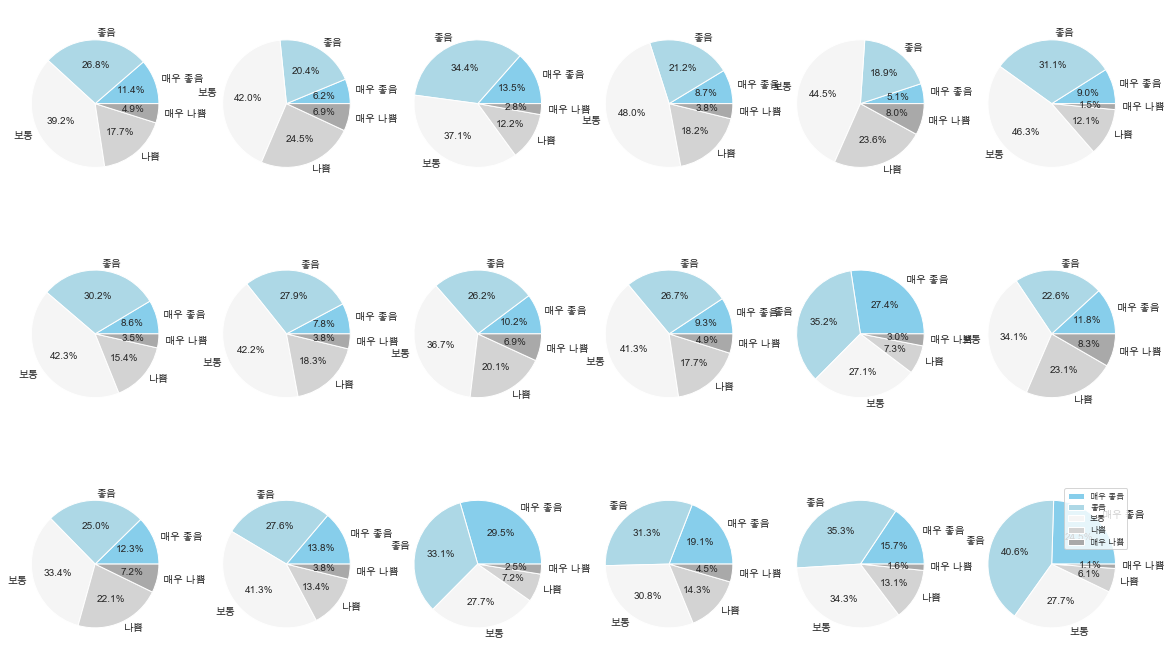

In [86]:
plt.figure(figsize=(20,12))
colors=['skyblue','lightblue','whitesmoke','lightgray', 'darkgray',]

for i in range(18):
    plt.subplot(3,6,i+1)
    plt.pie([recog_atmos['verygood'][i],recog_atmos['good'][i],recog_atmos['moderate'][i],recog_atmos['bad'][i],recog_atmos['verybad'][i]], labels=['매우 좋음','좋음', '보통','나쁨','매우 나쁨'], colors=colors, autopct='%.1f%%')
    plt.title(recog_atmos.sido[i],fontsize=15,color='white')

plt.legend(loc='upper right',fontsize=8)
plt.show()

- 상위 : 인천, 서울, 대구
- 하위 : 제주, 전남, 강원

(2) 환경 문제에 대한 인식 : 미세먼지 유입

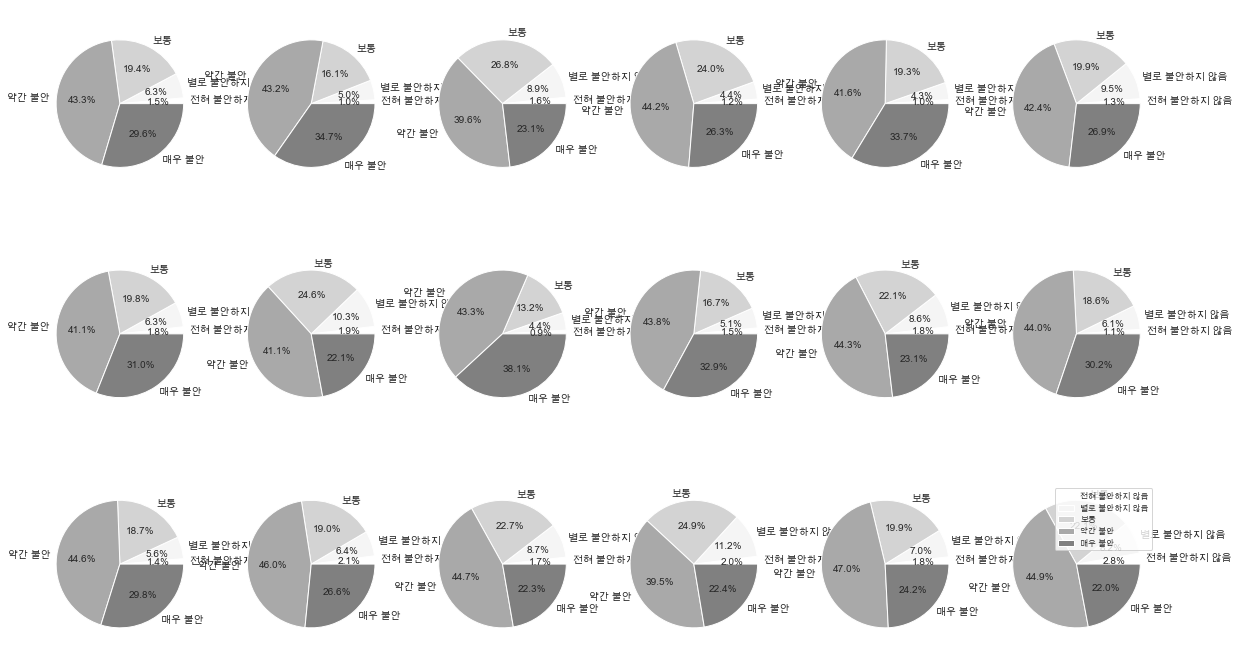

In [114]:

plt.figure(figsize=(20,12))
colors=['white','whitesmoke','lightgray', 'darkgray','gray']

for i in range(18):
    plt.subplot(3,6,i+1)
    plt.pie([recog_dust['anx0'][i],recog_dust['anx25'][i],recog_dust['anx50'][i],recog_dust['anx75'][i],recog_dust['anx100'][i]], labels=['전혀 불안하지 않음','별로 불안하지 않음', '보통', '약간 불안', '매우 불안'], colors=colors, autopct='%.1f%%')
    plt.title(recog_dust.sido[i],fontsize=15,color='white')

plt.legend(loc='upper right',fontsize=8)
plt.show()

- 상위권 : 세종, 수도권(서울, 경기, 인천)
- 하위권 : 부산, 울산, 경북

(3) 환경 문제에 대한 인식 : 기후 변화

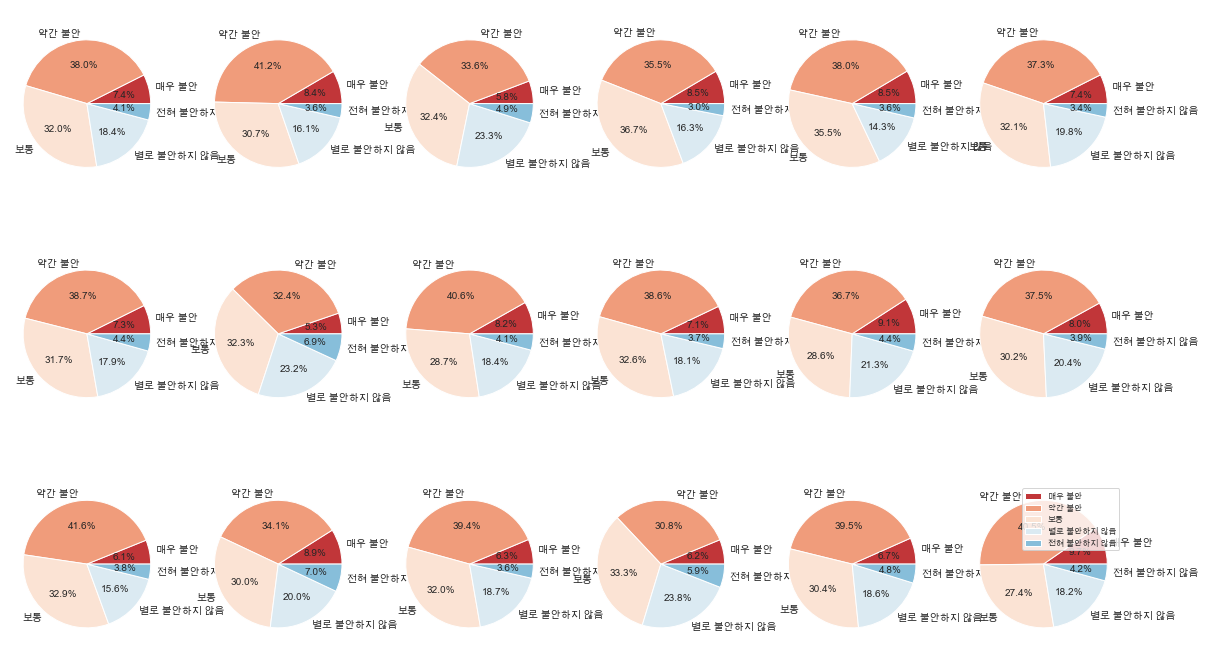

In [108]:
plt.figure(figsize=(20,12))
colors=sns.color_palette('RdBu')

for i in range(18):
    plt.subplot(3,6,i+1)
    plt.pie([recog_change['anx100'][i],recog_change['anx75'][i],recog_change['anx50'][i],recog_change['anx25'][i],recog_change['anx0'][i]], labels=['매우 불안', '약간 불안','보통','별로 불안하지 않음','전혀 불안하지 않음'], colors=colors, autopct='%.1f%%')
    plt.title(recog_change.sido[i],fontsize=15,color='white')

plt.legend(loc='upper right',fontsize=8)
plt.show()

'매우 불안 + 약간 불안' 비중 
- 상위권: 제주, 서울
- 하위권 : 경북, 울산, 부산

### df 하나로 합치기

In [115]:
car.columns=['sido','car_2018','car_2019','car_2020']
car

,sido,car_2018,car_2019,car_2020
0,서울,9564,14952,20997
1,제주,15549,18178,20699
2,경기,6383,11750,17197
3,대구,6605,11313,12468
4,경북,2001,4051,5400
5,경남,2107,3626,5003
6,전남,1974,3326,4576
7,부산,1567,3216,4320
8,충남,1127,2841,4252
9,인천,1284,2598,4204


In [116]:
subsidy.columns = ['sido', 'subsidy_elec', 'subsidy_hydro']
subsidy

,sido,subsidy_elec,subsidy_hydro
12,전북,900,1400
14,경북,850,1000
11,충남,850,1000
13,전남,840,1350
10,충북,800,1000
15,경남,700,1060
5,대전,700,1000
6,울산,550,1150
9,강원,520,1500
8,경기,500,1000


In [117]:
station.columns = ['sido', 'station_2016', 'station_2017', 'station_2018', 'station_2019', 'station_2020']
station.head()

,sido,station_2016,station_2017,station_2018,station_2019,station_2020
1,경기,22,572,632,682,737
8,서울,28,444,518,546,580
2,경남,23,197,233,253,265
5,대구,4,181,205,223,241
3,경북,8,128,178,192,209


In [119]:
dust

,sido,dust2.5,dust10
8,경기,31,52
11,충남,32,52
0,서울,29,48
7,세종,27,47
3,인천,28,46
10,충북,28,46
5,대전,21,42
12,전북,26,42
2,대구,24,41
4,광주,25,40


In [120]:
atmos_score=[]
for i, row in recog_atmos.iterrows():
    temp=row['verygood'] + row['good']*2 + row['moderate']*3 + row['bad']*4 + row['verybad']*5
    atmos_score.append(temp)
print(atmos_score)

[277.943, 305.486, 256.38, 287.31, 310.64000000000004, 266.053, 275.147, 282.379, 287.121, 282.18800000000005, 223.396, 293.608, 286.877, 265.796, 220.23399999999998, 253.876, 249.69499999999996, 218.62]


In [121]:
change_score=[]
for i, row in recog_change.iterrows():
    temp=row['anx0'] + row['anx25']*2 + row['anx50']*3 + row['anx75']*4 + row['anx100']*5
    change_score.append(temp)
print(change_score)

[326.19800000000004, 334.73699999999997, 312.075, 330.129, 333.49300000000005, 325.554, 326.767, 305.959, 330.238, 327.258, 324.89599999999996, 325.42400000000004, 330.482, 317.93, 326.158, 307.608, 324.6, 333.21399999999994]


In [122]:
dust_score=[]
for i, row in recog_dust.iterrows():
    temp=row['anx0'] + row['anx25']*2 + row['anx50']*3 + row['anx75']*4 + row['anx100']*5
    dust_score.append(temp)
print(dust_score)

[393.247, 405.759, 373.649, 390.009, 402.615, 384.065, 393.244, 371.295, 413.283, 401.486, 378.312, 396.028, 395.933, 388.601, 377.089, 369.129, 384.814, 375.256]


In [123]:
recog_atmos['atmos_score']=atmos_score
recog_change['change_score']=change_score
recog_dust['dust_score']=dust_score

In [137]:
df = pd.merge(car, station, on='sido')
df.head()

,sido,car_2018,car_2019,car_2020,station_2016,station_2017,station_2018,station_2019,station_2020
0,서울,9564,14952,20997,28,444,518,546,580
1,제주,15549,18178,20699,7,156,186,205,203
2,경기,6383,11750,17197,22,572,632,682,737
3,대구,6605,11313,12468,4,181,205,223,241
4,경북,2001,4051,5400,8,128,178,192,209


In [138]:
df = pd.merge(df, subsidy, on='sido')
df.head()

,sido,car_2018,car_2019,car_2020,station_2016,station_2017,station_2018,station_2019,station_2020,subsidy_elec,subsidy_hydro
0,서울,9564,14952,20997,28,444,518,546,580,200,1100
1,제주,15549,18178,20699,7,156,186,205,203,450,0
2,경기,6383,11750,17197,22,572,632,682,737,500,1000
3,대구,6605,11313,12468,4,181,205,223,241,450,900
4,경북,2001,4051,5400,8,128,178,192,209,850,1000


In [139]:
df = pd.merge(df, dust, on='sido')
df.head()

,sido,car_2018,car_2019,car_2020,station_2016,station_2017,station_2018,station_2019,station_2020,subsidy_elec,subsidy_hydro,dust2.5,dust10
0,서울,9564,14952,20997,28,444,518,546,580,200,1100,29,48
1,제주,15549,18178,20699,7,156,186,205,203,450,0,17,34
2,경기,6383,11750,17197,22,572,632,682,737,500,1000,31,52
3,대구,6605,11313,12468,4,181,205,223,241,450,900,24,41
4,경북,2001,4051,5400,8,128,178,192,209,850,1000,22,40


In [135]:
recog = pd.merge(recog_atmos, recog_dust, on='sido')
recog.head()

,sido,verygood,good,moderate,bad,verybad,atmos_score,anx0,anx25,anx50,anx75,anx100,dust_score
0,전국,11.356,26.826,39.217,17.721,4.880,277.943,1.450,6.321,19.352,43.286,29.591,393.247
1,서울,6.249,20.370,41.958,24.492,6.931,305.486,0.963,4.996,16.077,43.242,34.721,405.759
2,부산,13.497,34.381,37.144,12.206,2.773,256.380,1.614,8.926,26.780,39.557,23.123,373.649
3,대구,8.668,21.249,48.022,18.222,3.838,287.310,1.156,4.400,24.008,44.151,26.285,390.009
4,인천,5.057,18.851,44.469,23.641,7.982,310.640,1.031,4.329,19.331,41.612,33.697,402.615


In [136]:
recog = pd.merge(recog, recog_change, on='sido')
recog.head()

,sido,verygood,good,moderate,bad,verybad,atmos_score,anx0_x,anx25_x,anx50_x,anx75_x,anx100_x,dust_score,anx0_y,anx25_y,anx50_y,anx75_y,anx100_y,change_score
0,전국,11.356,26.826,39.217,17.721,4.880,277.943,1.450,6.321,19.352,43.286,29.591,393.247,4.144,18.386,32.030,38.008,7.432,326.198
1,서울,6.249,20.370,41.958,24.492,6.931,305.486,0.963,4.996,16.077,43.242,34.721,405.759,3.580,16.142,30.664,41.189,8.425,334.737
2,부산,13.497,34.381,37.144,12.206,2.773,256.380,1.614,8.926,26.780,39.557,23.123,373.649,4.890,23.320,32.399,33.612,5.780,312.075
3,대구,8.668,21.249,48.022,18.222,3.838,287.310,1.156,4.400,24.008,44.151,26.285,390.009,3.043,16.260,36.691,35.532,8.473,330.129
4,인천,5.057,18.851,44.469,23.641,7.982,310.640,1.031,4.329,19.331,41.612,33.697,402.615,3.624,14.328,35.499,38.029,8.520,333.493


In [147]:
recog = recog[['sido','atmos_score','dust_score','change_score']]
recog.head()

,sido,atmos_score,dust_score,change_score
0,전국,277.943,393.247,326.198
1,서울,305.486,405.759,334.737
2,부산,256.380,373.649,312.075
3,대구,287.310,390.009,330.129
4,인천,310.640,402.615,333.493


In [148]:
df = pd.merge(df,recog,on='sido')
df.head()

,sido,car_2018,car_2019,car_2020,station_2016,station_2017,station_2018,station_2019,station_2020,subsidy_elec,subsidy_hydro,dust2.5,dust10,atmos_score,dust_score,change_score
0,서울,9564,14952,20997,28,444,518,546,580,200,1100,29,48,305.486,405.759,334.737
1,제주,15549,18178,20699,7,156,186,205,203,450,0,17,34,218.620,375.256,333.214
2,경기,6383,11750,17197,22,572,632,682,737,500,1000,31,52,282.188,401.486,327.258
3,대구,6605,11313,12468,4,181,205,223,241,450,900,24,41,287.310,390.009,330.129
4,경북,2001,4051,5400,8,128,178,192,209,850,1000,22,40,253.876,369.129,307.608


#### 히트맵으로 상관계수 파악

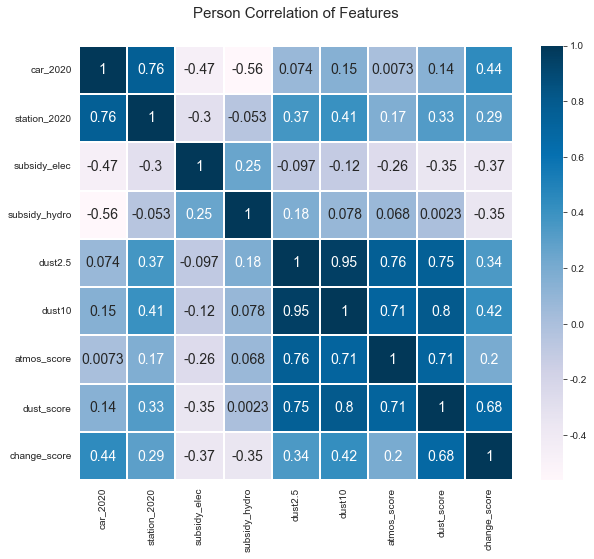

In [158]:
heatmap_data = df[['car_2020', 'station_2020',
       'subsidy_elec', 'subsidy_hydro', 'dust2.5', 'dust10', 'atmos_score',
       'dust_score', 'change_score']]
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8)) 
plt.title("Person Correlation of Features", y = 1.05, size = 15) 
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 14})

# sns.heatmap(df2020, annot=True, fmt='d')

# plt.title('heatmap about ', fontsize=20)

plt.show()

- '지역별 전기차 등록차량 수'와 상관계수가 높은 것은 '충전소 수' 뿐이다. 기후 변화 인식이 그나마 0.44로 다른 변수들 보다는 높지만 0.5를 넘기지 못하므로 크게 유의미하다 볼 수는 없다.

- 미세먼지와 초미세먼지 간 상관계수는 0.95로 상당히 높다.(어찌보면 당연한 결과)

- 초미세먼지(PM2.5)와 체감 대기환경, 미세먼지 유입에 대한 인식 간 상관계수는 각각 0.76, 0.75로 높은편인 반면, 기후 변화 인식은 0.34로 높은 편은 아니다.

- 미세먼지(PM10)와 체감 대기환경, 미세먼지 유입에 대한 인식 간 상관계수는 각각 0.71, 0.8로 높은편이고, 역시나 기후 변화 인식은 0.42로 높은 편이 아니다.

- 체감 대기환경과 미세먼지 유입 인식 간 상관계수는 0.71로 높은 편이나, 체감 대기환경과 기후 변화 인식 간 상관계수는 0.2로 낮다. 그런데, 미세먼지 유입 인식과 기후변화 인식 간 상관계수는 0.68로 높은 편이다. 흥미로운 지점이다. 

- 전기차 보조금은 대부분 음의 상관관계로 나타나므로 현재 보조금의 금액 자체가 전기차 구매에 미치는 영향은 크지 않다고 볼 수도 있다.

<Figure size 720x720 with 0 Axes>

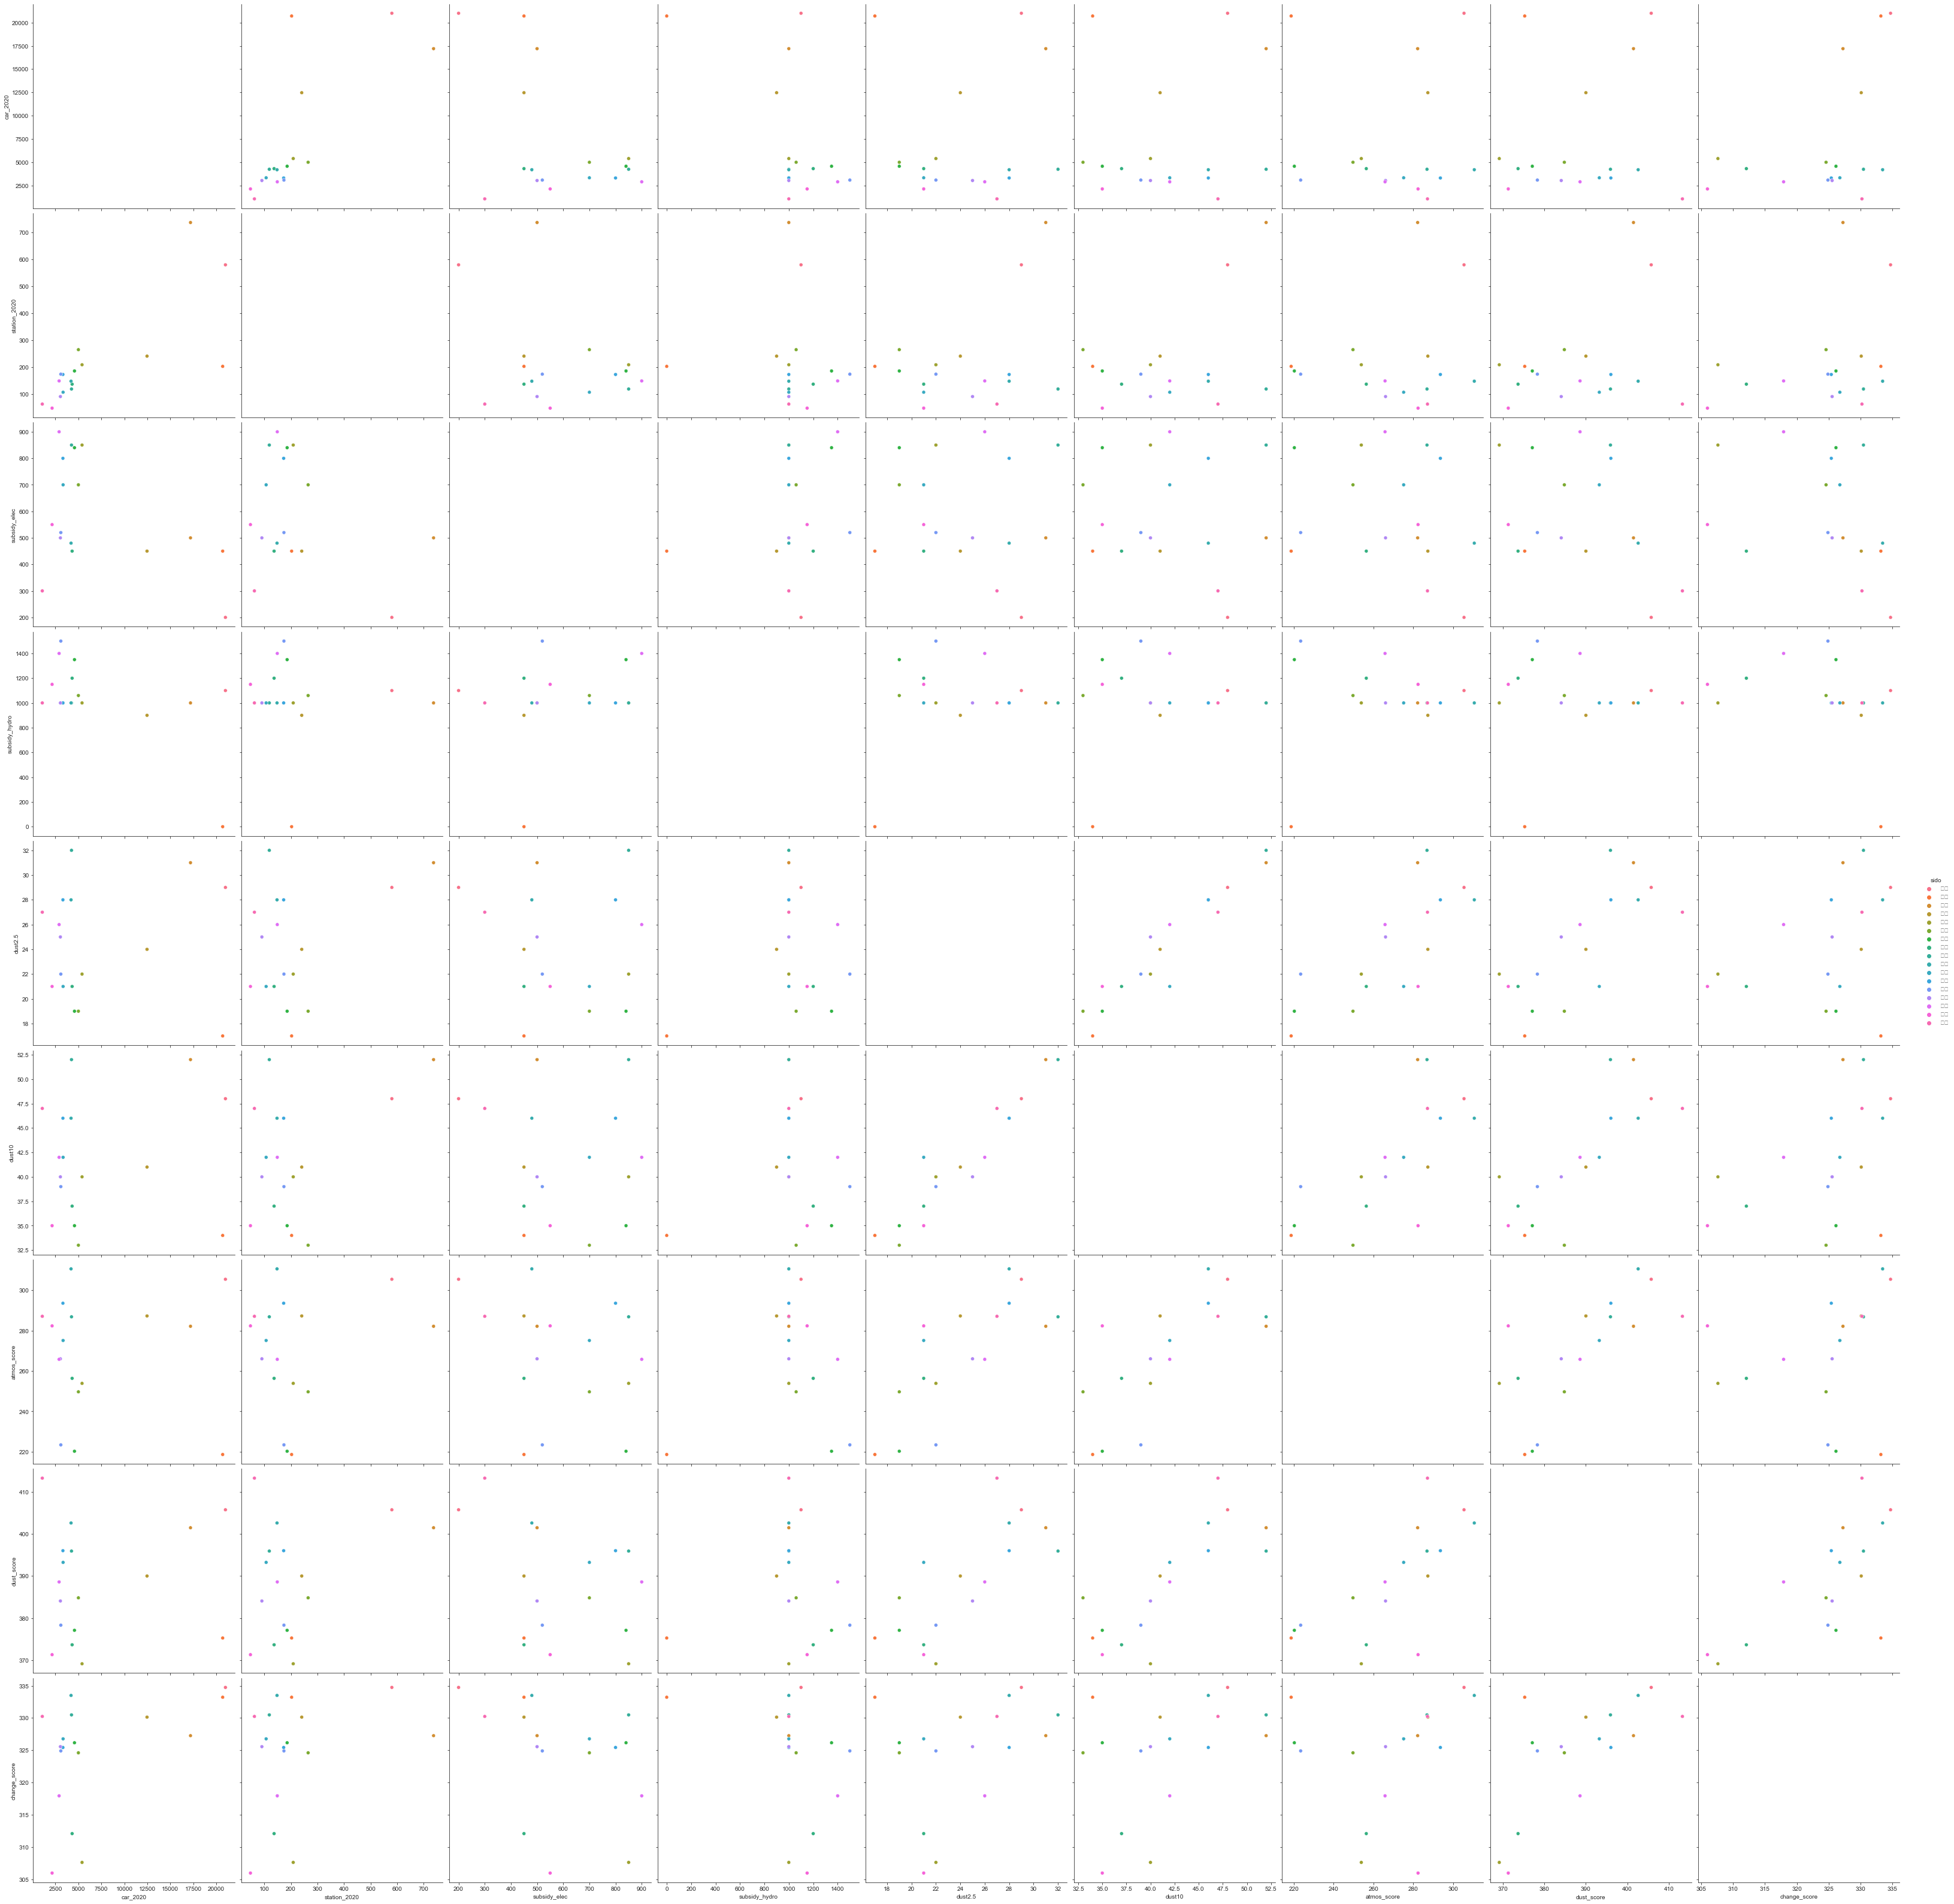

In [162]:
pairplot_data = df[['sido','car_2020', 'station_2020',
       'subsidy_elec', 'subsidy_hydro', 'dust2.5', 'dust10', 'atmos_score',
       'dust_score', 'change_score']]
plt.figure(figsize=(10,10))
sns.set_style('ticks')
sns.pairplot(pairplot_data, hue='sido', height=5)
plt.show()

In [194]:
from matplotlib import rc
rc("font", family="AppleGothic")
%matplotlib inline
# get_ipython().run_line_magic("matplotlib", "inline")

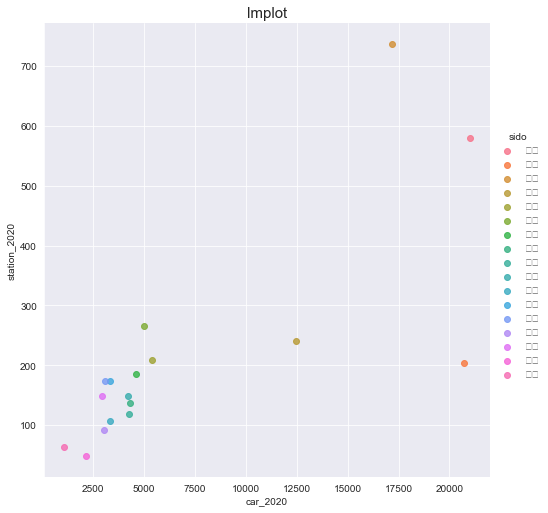

In [195]:
sns.set_style('darkgrid')
sns.lmplot(x='car_2020',y='station_2020', data=df, height=7, hue='sido')
plt.title('lmplot', fontsize=15)
plt.show()

# 결론

1. 전기차 구매 예상 요인으로 선정한 '미세먼지, 초미세먼지, 주관적 환경인식(체감 대기환경, 미세먼지 유입, 기후변화)' 변수들은 실제로 유의미한 영향을 미치지는 않는다. 하지만, 데이터가 많지 않고 지역별로 나누어 본 것이므로 실제로 변수 간 관계를 파악하기 위해선 더 고차원의 데이터가 필요할 것으로 예상된다.

2. 대체로 지역별 전기차 등록 수와 충전소 수는 연관이 있는 것으로 나타났는데, 구체적인 선후관계 파악 및 분석까지 이루어진다면 인과관계도 파악해볼 수 있을 것으로 보인다.